### 데이터 프레임으로 직접 만든 데이터셋 읽기

In [13]:
import pandas as pd
import lightgbm
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.metrics import explained_variance_score

data = pd.read_csv("C:\\Users\CAD&VLSI\\Desktop\\CAD\\dataset\\expression.csv")
#data.head(5)
data.tail(5)

,a,b,c,d,exp
6995,142.69,863.78,925.97,545.60,8.783265e+05
6996,503.50,653.54,505.15,525.68,5.092145e+05
6997,161.03,411.95,387.18,785.53,1.766245e+05
6998,856.03,174.61,906.35,112.57,1.554370e+06
6999,222.21,227.26,171.69,448.88,7.930362e+04


### 산점도를 이용한 데이터 셋에 있는 특성 간의 관계 요약

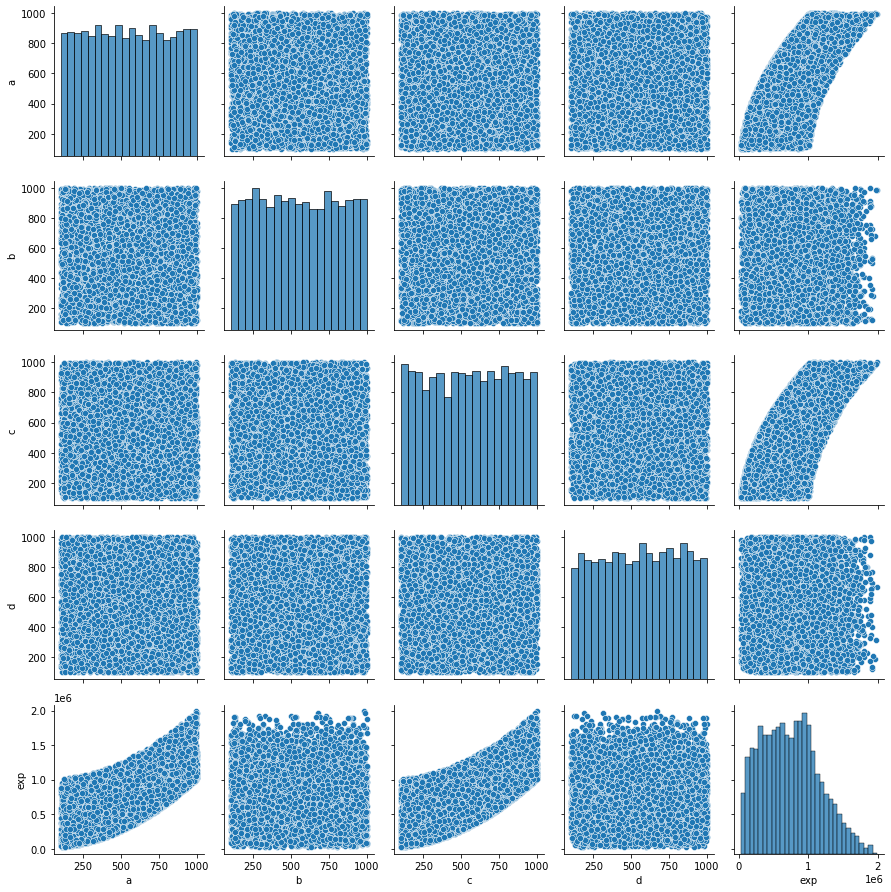

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['a','b','c','d','exp']
sns.pairplot(data)
plt.tight_layout()
plt.show()

### Correlation matrix
#### target variable과 상관 관계가 높은 특성을 선택하는 것이 유용 

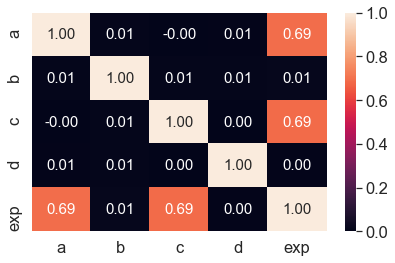

In [3]:
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':15}, yticklabels=cols, xticklabels=cols)
plt.tight_layout()
plt.show()

### 

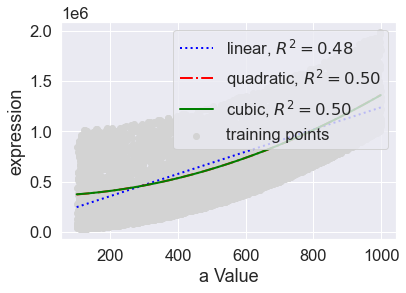

In [9]:
from sklearn.preprocessing import PolynomialFeatures
XX = data[['a']].values
yy = data['exp'].values

regr = LinearRegression()

quad = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quad.fit_transform(XX)
X_cubic = cubic.fit_transform(XX)

X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
regr = regr.fit(XX,yy)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(yy, regr.predict(XX))

regr = regr.fit(X_quad,yy)
y_quad_fit = regr.predict(quad.fit_transform(X_fit))
quadratic_r2 = r2_score(yy, regr.predict(X_quad))

regr = regr.fit(X_cubic,yy)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(yy, regr.predict(X_cubic))

plt.scatter(XX,yy, label = 'training points', color = 'lightgray')
plt.plot(X_fit, y_lin_fit, label = 'linear, $R^2=%.2f$' % linear_r2, color = 'blue', lw=2, linestyle=':')
plt.plot(X_fit, y_quad_fit, label = 'quadratic, $R^2=%.2f$' % quadratic_r2, color = 'red', lw=2, linestyle='-.')
plt.plot(X_fit, y_cubic_fit, label = 'cubic, $R^2=%.2f$' % cubic_r2, color = 'green', lw=2, linestyle='-')

plt.xlabel('a Value')
plt.ylabel('expression')
plt.legend(loc = 'upper right')
plt.show()

### Evaluation of regression model

In [4]:
new_data = data[['a','b','c','d']]

X = new_data.values
y = data['exp'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train[:10], y_train[:10])

[[186.34 902.2  178.84 207.64]
 [763.18 739.92 638.37 688.97]
 [285.05 559.87 558.49 213.08]
 [489.17 465.57 739.52 258.71]
 [448.15 507.96 223.33 405.17]
 [977.05 306.77 757.12 374.73]
 [878.59 695.73 552.45 426.62]
 [952.48 318.79 517.66 745.58]
 [969.31 498.28 990.92 120.71]
 [955.49 680.65 473.56 722.55]] [  66913.9812  990648.9393  393377.6626  786435.8293  251119.8814
 1528232.127  1077548.011  1175935.606  1921605.033  1137942.764 ]


In [5]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(time_out=5, seed=42)
model.fit(X_train, y_train)

LGBMRegressor(seed=42, time_out=5)

In [6]:
predictions = model.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.9995493173136901
